So far we've learnt the most basic but crucial algorithms a data scientist and a machine learning engineer must know. We've learnt the techniques for classification and regression, and we've done some very rudementary data exploration. Hopefully, you've also done the assignments and the mini projects in the courses we recommended you to do. In this assignment, we give you a very easy dataset on which you can perform both classification and regression tasks. The purpose of this assignment is for you to try your hand out at all the techniques you've learnt so far and work on a real dataset to figure out whether what you learnt up until now works.

## Link to the Dataset

https://archive.ics.uci.edu/ml/datasets/wine+quality

For you to submit this assingment, you'll have to give us the accuracy you're getting on your classification, what algorithms/techniques you used for classification and why. Also, you'll give us the minimum loss you got in your regression, what algorithms/techniques you used and why. Just as last assignment, you'll clone the original folder, work completely on this Jupyter notebook and submit all your work. Also, you'll include in a text cell the above things. Happy playing on this dataset!


## Some things that must be present in the notebook
- Read the dataset and display various details of data (correlation,some statistics etc..)
- Split the data into train test split
- Show some vizualizations
- Models for both classification and regression.
- Show the results clearly and all of them must be on the test set

This [book](https://github.com/dvrg/educate-resource-for-machine-learning/blob/master/6.%20Machine%20Learning%20Mastery%20With%20Python%20Understand%20Your%20Data%2C%20Create%20Accurate%20Models%20and%20work%20Projects%20End-to-End.pdf) is a great resource for data science/predictive modelling in general and can be used as reference book for this task and future. The book highlights all the necessary steps one must take to understand data and build powerful models in a simple and understandable manner. 

### Accuracy on your classification task and the reason you used this algorithm/technique -> 
0.9975262832405689 = lightgbm, 
0.9931972789115646 = ExtraTreesClassifier, 
0.9950525664811379 = CatBoostClassifier, 
1.0 = LinearDiscriminantAnalysis, 

LR: 0.898949 (0.026136),   
LDA: 1.000000 (0.000000),    
KNN: 0.462040 (0.034592),    
CART: 0.968152 (0.006591),     
NB: 0.868729 (0.024258),    
SVM: 0.519215 (0.048890),,     
ETC: 0.993877 (0.004471),     
RFC: 0.986733 (0.010375),     
ABC: 0.987345 (0.006567),     
GBC: 0.985711 (0.005548),     
XGBC: 0.990405 (0.004566),     
BC: 0.984690 (0.007810),     
RFC: 0.992856 (0.005101),     
ETC: 0.996122 (0.002806),     

### Minimum loss on you regression task and the reason you used this algorithm/technique ->
0.00015491835629669742 = lasso,       
0.0009063967668607731 = Elasticnet,       
0.0004243748674409908 = KNeighborsRegressor,       

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

df_red=pd.read_csv("winequality-white.csv",sep=';')
df_white=pd.read_csv("winequality-white.csv",sep=';')

print(df_red.shape)
#print(df_white.shape)
print(df_red.head())
#print(df_white.head())
class_counts = df_red.groupby('quality').size()
print(class_counts)

(4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.

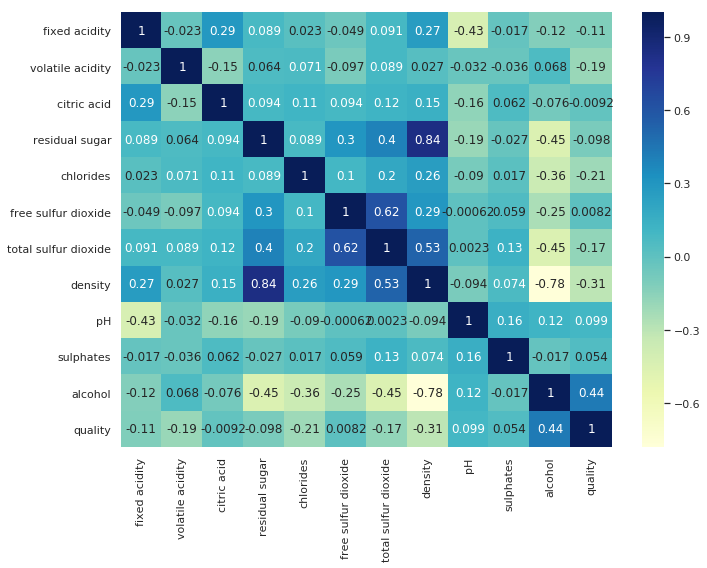

In [2]:
corr=df_red.corr()
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(corr,annot=True,cmap="YlGnBu")

In [3]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA
quality=df_red['quality']
array = df_red.values
X = array[:,0:11]
Y = array[:,11]
# feature extraction
pca = PCA(n_components=6)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)
df_red=pca.fit_transform(df_red)
df_red=pd.DataFrame(df_red)
df_red.insert(6,'quality',quality,True)

Explained Variance: [9.09657344e-01 7.93338631e-02 1.01542742e-02 5.06004450e-04
 3.23409395e-04 8.72769740e-06]
[[ 1.54440234e-03  1.69003682e-04  3.38650580e-04  4.73275284e-02
   9.75740505e-05  2.61877002e-01  9.63857636e-01  3.59698303e-05
   3.38465456e-06  3.40902808e-04 -1.25037482e-02]
 [-9.16349763e-03 -1.54546977e-03  1.40306911e-04  1.49431815e-02
  -7.18299806e-05  9.64685369e-01 -2.62736857e-01 -1.83631853e-05
  -4.16985633e-05 -3.61111182e-04  6.45519597e-03]
 [ 1.29002621e-02  9.28887403e-04  1.25844404e-03  9.95191728e-01
   7.84988105e-05 -2.63931831e-02 -4.27888053e-02  4.46897943e-04
  -7.01734244e-03 -2.14205322e-03 -8.27226781e-02]
 [-1.47657857e-01  1.54517098e-02 -5.00452863e-03  8.42004842e-02
  -6.57323159e-03 -6.38110898e-03  1.06135065e-02 -1.15165705e-03
   1.70271362e-02  2.60091346e-03  9.85062967e-01]
 [ 9.84964681e-01 -3.97807571e-03  4.16921666e-02 -8.08023120e-04
  -1.49778517e-03  7.87469051e-03 -1.75276556e-03  3.28441957e-04
  -7.55059384e-02 -3.53

In [4]:
print(df_red.shape)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_red, test_size=0.33, random_state=42)

x_train=train.drop('quality',axis=1)
y_train=train['quality']

x_test=test.drop('quality',axis=1)
y_test=test['quality']

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4898, 7)
(3281, 6)
(3281,)
(1617, 6)
(1617,)


In [5]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9931972789115646

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors

In [10]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=42,learning_rate=0.9,n_estimators=100)
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.9919604205318491


In [11]:
import lightgbm as lgb

train_data=lgb.Dataset(x_train,label=y_train)
#define parameters
params = {'learning_rate':0.1,'n_estimators':1000}
model= lgb.train(params, train_data, 100)
y_pred=model.predict(x_test)
y_pred=y_pred.round()

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

/home/user/.local/lib/python2.7/site-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.9975262832405689

In [12]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
categorical_features_indices = np.where(df_red.dtypes != np.float)[0]
model.fit(x_train,y_train,eval_set=(x_test, y_test))
model.score(x_test,y_test)

0:	learn: -1.8404715	test: -1.8415236	best: -1.8415236 (0)	total: 566ms	remaining: 9m 25s
1:	learn: -1.7390158	test: -1.7403711	best: -1.7403711 (1)	total: 718ms	remaining: 5m 58s
2:	learn: -1.6476001	test: -1.6484587	best: -1.6484587 (2)	total: 929ms	remaining: 5m 8s
3:	learn: -1.5712996	test: -1.5719900	best: -1.5719900 (3)	total: 1.19s	remaining: 4m 55s
4:	learn: -1.4933109	test: -1.4934200	best: -1.4934200 (4)	total: 1.42s	remaining: 4m 43s
5:	learn: -1.4237358	test: -1.4231953	best: -1.4231953 (5)	total: 1.73s	remaining: 4m 46s
6:	learn: -1.3681246	test: -1.3676282	best: -1.3676282 (6)	total: 1.99s	remaining: 4m 42s
7:	learn: -1.3121667	test: -1.3132882	best: -1.3132882 (7)	total: 2.26s	remaining: 4m 40s
8:	learn: -1.2655962	test: -1.2660970	best: -1.2660970 (8)	total: 2.44s	remaining: 4m 29s
9:	learn: -1.2204232	test: -1.2205216	best: -1.2205216 (9)	total: 2.62s	remaining: 4m 19s
10:	learn: -1.1731644	test: -1.1737326	best: -1.1737326 (10)	total: 2.8s	remaining: 4m 11s
11:	learn:

90:	learn: -0.2009065	test: -0.2028330	best: -0.2028330 (90)	total: 17.8s	remaining: 2m 57s
91:	learn: -0.1982780	test: -0.2004023	best: -0.2004023 (91)	total: 18s	remaining: 2m 57s
92:	learn: -0.1954257	test: -0.1975646	best: -0.1975646 (92)	total: 18.2s	remaining: 2m 57s
93:	learn: -0.1923140	test: -0.1947344	best: -0.1947344 (93)	total: 18.3s	remaining: 2m 56s
94:	learn: -0.1894104	test: -0.1919646	best: -0.1919646 (94)	total: 18.5s	remaining: 2m 56s
95:	learn: -0.1867889	test: -0.1894308	best: -0.1894308 (95)	total: 18.6s	remaining: 2m 55s
96:	learn: -0.1841264	test: -0.1868510	best: -0.1868510 (96)	total: 18.8s	remaining: 2m 55s
97:	learn: -0.1815923	test: -0.1844327	best: -0.1844327 (97)	total: 19s	remaining: 2m 54s
98:	learn: -0.1790820	test: -0.1819837	best: -0.1819837 (98)	total: 19.2s	remaining: 2m 54s
99:	learn: -0.1770401	test: -0.1799941	best: -0.1799941 (99)	total: 19.4s	remaining: 2m 54s
100:	learn: -0.1747341	test: -0.1776418	best: -0.1776418 (100)	total: 19.5s	remainin

178:	learn: -0.0789998	test: -0.0866316	best: -0.0866316 (178)	total: 31.8s	remaining: 2m 25s
179:	learn: -0.0782017	test: -0.0859054	best: -0.0859054 (179)	total: 31.9s	remaining: 2m 25s
180:	learn: -0.0776805	test: -0.0854634	best: -0.0854634 (180)	total: 32.1s	remaining: 2m 25s
181:	learn: -0.0771378	test: -0.0850271	best: -0.0850271 (181)	total: 32.2s	remaining: 2m 24s
182:	learn: -0.0763875	test: -0.0842199	best: -0.0842199 (182)	total: 32.4s	remaining: 2m 24s
183:	learn: -0.0757124	test: -0.0835713	best: -0.0835713 (183)	total: 32.6s	remaining: 2m 24s
184:	learn: -0.0750023	test: -0.0828064	best: -0.0828064 (184)	total: 32.7s	remaining: 2m 24s
185:	learn: -0.0744224	test: -0.0822426	best: -0.0822426 (185)	total: 32.9s	remaining: 2m 23s
186:	learn: -0.0739688	test: -0.0819488	best: -0.0819488 (186)	total: 33s	remaining: 2m 23s
187:	learn: -0.0732884	test: -0.0813101	best: -0.0813101 (187)	total: 33.2s	remaining: 2m 23s
188:	learn: -0.0726861	test: -0.0808470	best: -0.0808470 (188)

267:	learn: -0.0457119	test: -0.0568307	best: -0.0568307 (267)	total: 46.4s	remaining: 2m 6s
268:	learn: -0.0454926	test: -0.0566198	best: -0.0566198 (268)	total: 46.6s	remaining: 2m 6s
269:	learn: -0.0453664	test: -0.0565302	best: -0.0565302 (269)	total: 46.7s	remaining: 2m 6s
270:	learn: -0.0451698	test: -0.0563881	best: -0.0563881 (270)	total: 46.9s	remaining: 2m 6s
271:	learn: -0.0449621	test: -0.0562669	best: -0.0562669 (271)	total: 47s	remaining: 2m 5s
272:	learn: -0.0449304	test: -0.0562302	best: -0.0562302 (272)	total: 47.2s	remaining: 2m 5s
273:	learn: -0.0448314	test: -0.0561546	best: -0.0561546 (273)	total: 47.3s	remaining: 2m 5s
274:	learn: -0.0446218	test: -0.0559707	best: -0.0559707 (274)	total: 47.5s	remaining: 2m 5s
275:	learn: -0.0444164	test: -0.0558417	best: -0.0558417 (275)	total: 47.6s	remaining: 2m 4s
276:	learn: -0.0441778	test: -0.0556587	best: -0.0556587 (276)	total: 47.8s	remaining: 2m 4s
277:	learn: -0.0438398	test: -0.0552974	best: -0.0552974 (277)	total: 47

357:	learn: -0.0311433	test: -0.0443889	best: -0.0443889 (357)	total: 1m 1s	remaining: 1m 50s
358:	learn: -0.0310080	test: -0.0442452	best: -0.0442452 (358)	total: 1m 1s	remaining: 1m 50s
359:	learn: -0.0309152	test: -0.0441795	best: -0.0441795 (359)	total: 1m 2s	remaining: 1m 50s
360:	learn: -0.0308420	test: -0.0441322	best: -0.0441322 (360)	total: 1m 2s	remaining: 1m 50s
361:	learn: -0.0307867	test: -0.0440983	best: -0.0440983 (361)	total: 1m 2s	remaining: 1m 50s
362:	learn: -0.0305922	test: -0.0439274	best: -0.0439274 (362)	total: 1m 2s	remaining: 1m 50s
363:	learn: -0.0304748	test: -0.0438208	best: -0.0438208 (363)	total: 1m 3s	remaining: 1m 50s
364:	learn: -0.0303884	test: -0.0437667	best: -0.0437667 (364)	total: 1m 3s	remaining: 1m 49s
365:	learn: -0.0303304	test: -0.0437263	best: -0.0437263 (365)	total: 1m 3s	remaining: 1m 49s
366:	learn: -0.0302035	test: -0.0436150	best: -0.0436150 (366)	total: 1m 3s	remaining: 1m 49s
367:	learn: -0.0300795	test: -0.0434830	best: -0.0434830 (36

444:	learn: -0.0225779	test: -0.0369653	best: -0.0369653 (444)	total: 1m 17s	remaining: 1m 36s
445:	learn: -0.0225030	test: -0.0369205	best: -0.0369205 (445)	total: 1m 17s	remaining: 1m 36s
446:	learn: -0.0224299	test: -0.0368316	best: -0.0368316 (446)	total: 1m 17s	remaining: 1m 36s
447:	learn: -0.0223652	test: -0.0367847	best: -0.0367847 (447)	total: 1m 17s	remaining: 1m 36s
448:	learn: -0.0223113	test: -0.0367367	best: -0.0367367 (448)	total: 1m 18s	remaining: 1m 35s
449:	learn: -0.0222513	test: -0.0367185	best: -0.0367185 (449)	total: 1m 18s	remaining: 1m 35s
450:	learn: -0.0221592	test: -0.0366362	best: -0.0366362 (450)	total: 1m 18s	remaining: 1m 35s
451:	learn: -0.0220693	test: -0.0365428	best: -0.0365428 (451)	total: 1m 18s	remaining: 1m 35s
452:	learn: -0.0220037	test: -0.0364885	best: -0.0364885 (452)	total: 1m 18s	remaining: 1m 35s
453:	learn: -0.0219184	test: -0.0363845	best: -0.0363845 (453)	total: 1m 18s	remaining: 1m 34s
454:	learn: -0.0218466	test: -0.0363147	best: -0.0

532:	learn: -0.0169722	test: -0.0318301	best: -0.0318301 (532)	total: 1m 31s	remaining: 1m 19s
533:	learn: -0.0169272	test: -0.0317743	best: -0.0317743 (533)	total: 1m 31s	remaining: 1m 19s
534:	learn: -0.0168902	test: -0.0317361	best: -0.0317361 (534)	total: 1m 31s	remaining: 1m 19s
535:	learn: -0.0168813	test: -0.0317292	best: -0.0317292 (535)	total: 1m 31s	remaining: 1m 19s
536:	learn: -0.0168490	test: -0.0317123	best: -0.0317123 (536)	total: 1m 31s	remaining: 1m 19s
537:	learn: -0.0168094	test: -0.0316672	best: -0.0316672 (537)	total: 1m 32s	remaining: 1m 19s
538:	learn: -0.0167746	test: -0.0316364	best: -0.0316364 (538)	total: 1m 32s	remaining: 1m 18s
539:	learn: -0.0167019	test: -0.0315438	best: -0.0315438 (539)	total: 1m 32s	remaining: 1m 18s
540:	learn: -0.0166627	test: -0.0315224	best: -0.0315224 (540)	total: 1m 32s	remaining: 1m 18s
541:	learn: -0.0166059	test: -0.0314612	best: -0.0314612 (541)	total: 1m 32s	remaining: 1m 18s
542:	learn: -0.0165541	test: -0.0314176	best: -0.0

619:	learn: -0.0134949	test: -0.0288497	best: -0.0288497 (619)	total: 1m 44s	remaining: 1m 4s
620:	learn: -0.0134711	test: -0.0288236	best: -0.0288236 (620)	total: 1m 44s	remaining: 1m 3s
621:	learn: -0.0134201	test: -0.0287820	best: -0.0287820 (621)	total: 1m 44s	remaining: 1m 3s
622:	learn: -0.0134007	test: -0.0287721	best: -0.0287721 (622)	total: 1m 45s	remaining: 1m 3s
623:	learn: -0.0133564	test: -0.0287339	best: -0.0287339 (623)	total: 1m 45s	remaining: 1m 3s
624:	learn: -0.0133126	test: -0.0286860	best: -0.0286860 (624)	total: 1m 45s	remaining: 1m 3s
625:	learn: -0.0132737	test: -0.0286610	best: -0.0286610 (625)	total: 1m 45s	remaining: 1m 3s
626:	learn: -0.0132335	test: -0.0286022	best: -0.0286022 (626)	total: 1m 45s	remaining: 1m 2s
627:	learn: -0.0132101	test: -0.0285883	best: -0.0285883 (627)	total: 1m 45s	remaining: 1m 2s
628:	learn: -0.0131719	test: -0.0285462	best: -0.0285462 (628)	total: 1m 46s	remaining: 1m 2s
629:	learn: -0.0131622	test: -0.0285324	best: -0.0285324 (62

707:	learn: -0.0108644	test: -0.0264619	best: -0.0264619 (707)	total: 1m 58s	remaining: 48.8s
708:	learn: -0.0108479	test: -0.0264532	best: -0.0264532 (708)	total: 1m 58s	remaining: 48.6s
709:	learn: -0.0108315	test: -0.0264494	best: -0.0264494 (709)	total: 1m 58s	remaining: 48.5s
710:	learn: -0.0108152	test: -0.0264323	best: -0.0264323 (710)	total: 1m 58s	remaining: 48.3s
711:	learn: -0.0107886	test: -0.0263878	best: -0.0263878 (711)	total: 1m 58s	remaining: 48.1s
712:	learn: -0.0107642	test: -0.0263754	best: -0.0263754 (712)	total: 1m 59s	remaining: 47.9s
713:	learn: -0.0107426	test: -0.0263474	best: -0.0263474 (713)	total: 1m 59s	remaining: 47.8s
714:	learn: -0.0107298	test: -0.0263425	best: -0.0263425 (714)	total: 1m 59s	remaining: 47.6s
715:	learn: -0.0106940	test: -0.0263182	best: -0.0263182 (715)	total: 1m 59s	remaining: 47.4s
716:	learn: -0.0106669	test: -0.0263062	best: -0.0263062 (716)	total: 1m 59s	remaining: 47.2s
717:	learn: -0.0106534	test: -0.0263034	best: -0.0263034 (71

796:	learn: -0.0090679	test: -0.0251782	best: -0.0251782 (796)	total: 2m 12s	remaining: 33.6s
797:	learn: -0.0090367	test: -0.0251451	best: -0.0251451 (797)	total: 2m 12s	remaining: 33.5s
798:	learn: -0.0090240	test: -0.0251413	best: -0.0251413 (798)	total: 2m 12s	remaining: 33.3s
799:	learn: -0.0090094	test: -0.0251407	best: -0.0251407 (799)	total: 2m 12s	remaining: 33.1s
800:	learn: -0.0090077	test: -0.0251410	best: -0.0251407 (799)	total: 2m 12s	remaining: 32.9s
801:	learn: -0.0089965	test: -0.0251288	best: -0.0251288 (801)	total: 2m 12s	remaining: 32.8s
802:	learn: -0.0089830	test: -0.0251080	best: -0.0251080 (802)	total: 2m 12s	remaining: 32.6s
803:	learn: -0.0089688	test: -0.0250947	best: -0.0250947 (803)	total: 2m 13s	remaining: 32.4s
804:	learn: -0.0089517	test: -0.0250846	best: -0.0250846 (804)	total: 2m 13s	remaining: 32.3s
805:	learn: -0.0089378	test: -0.0250696	best: -0.0250696 (805)	total: 2m 13s	remaining: 32.1s
806:	learn: -0.0089111	test: -0.0250347	best: -0.0250347 (80

885:	learn: -0.0076577	test: -0.0241852	best: -0.0241852 (885)	total: 2m 26s	remaining: 18.8s
886:	learn: -0.0076501	test: -0.0241815	best: -0.0241815 (886)	total: 2m 26s	remaining: 18.6s
887:	learn: -0.0076328	test: -0.0241865	best: -0.0241815 (886)	total: 2m 26s	remaining: 18.5s
888:	learn: -0.0076216	test: -0.0241803	best: -0.0241803 (888)	total: 2m 26s	remaining: 18.3s
889:	learn: -0.0075961	test: -0.0241666	best: -0.0241666 (889)	total: 2m 26s	remaining: 18.1s
890:	learn: -0.0075789	test: -0.0241488	best: -0.0241488 (890)	total: 2m 26s	remaining: 18s
891:	learn: -0.0075620	test: -0.0241276	best: -0.0241276 (891)	total: 2m 27s	remaining: 17.8s
892:	learn: -0.0075477	test: -0.0241227	best: -0.0241227 (892)	total: 2m 27s	remaining: 17.6s
893:	learn: -0.0075350	test: -0.0241195	best: -0.0241195 (893)	total: 2m 27s	remaining: 17.5s
894:	learn: -0.0075195	test: -0.0241144	best: -0.0241144 (894)	total: 2m 27s	remaining: 17.3s
895:	learn: -0.0074985	test: -0.0240955	best: -0.0240955 (895)

974:	learn: -0.0065668	test: -0.0233871	best: -0.0233871 (974)	total: 2m 40s	remaining: 4.11s
975:	learn: -0.0065588	test: -0.0233886	best: -0.0233871 (974)	total: 2m 40s	remaining: 3.95s
976:	learn: -0.0065475	test: -0.0233832	best: -0.0233832 (976)	total: 2m 40s	remaining: 3.78s
977:	learn: -0.0065282	test: -0.0233574	best: -0.0233574 (977)	total: 2m 40s	remaining: 3.62s
978:	learn: -0.0065131	test: -0.0233400	best: -0.0233400 (978)	total: 2m 41s	remaining: 3.45s
979:	learn: -0.0065020	test: -0.0233461	best: -0.0233400 (978)	total: 2m 41s	remaining: 3.29s
980:	learn: -0.0064888	test: -0.0233238	best: -0.0233238 (980)	total: 2m 41s	remaining: 3.12s
981:	learn: -0.0064872	test: -0.0233244	best: -0.0233238 (980)	total: 2m 41s	remaining: 2.96s
982:	learn: -0.0064785	test: -0.0233205	best: -0.0233205 (982)	total: 2m 41s	remaining: 2.79s
983:	learn: -0.0064695	test: -0.0233192	best: -0.0233192 (983)	total: 2m 41s	remaining: 2.63s
984:	learn: -0.0064571	test: -0.0233130	best: -0.0233130 (98

0.9950525664811379

In [13]:
# Evaluate using a train and a test set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10,random_state=42,class_weight='balanced')
model.fit(x_train, y_train)
model.score(x_test, y_test)

/home/user/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/user/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9882498453927026

In [14]:
# Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

array = df_red.values
X = array[:,0:6]
Y = array[:,6]
num_folds = 10
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression(C=10,random_state=42,class_weight='balanced')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

Accuracy: 98.224% (1.103%)


In [15]:
# Evaluate using Shuffle Split Cross Validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = df_red.values
X = array[:,0:6]
Y = array[:,6]
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression(C=10,random_state=42,class_weight='balanced')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

Accuracy: 98.491% (0.192%)


In [16]:
# Cross Validation Classification Accuracy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = df_red.values
X = array[:,0:6]
Y = array[:,6]
kfold = KFold(n_splits=20, random_state=1)
model = LogisticRegression(C=10,random_state=1,class_weight='balanced')
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

Accuracy: 0.983 (0.012)


In [17]:
# Cross Validation Classification Confusion Matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

array = df_red.values
X = array[:,0:6]
Y = array[:,6]
test_size = 0.33
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
model = LogisticRegression(C=10,random_state=42,class_weight='balanced')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[  1   6   0   0   0   0]
 [  0  40   6   0   0   0]
 [  0   0 470   2   0   0]
 [  0   0   5 726   0   0]
 [  0   0   0   0 304   0]
 [  0   0   0   0   0  57]]


In [18]:
# Cross Validation Classification Report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

array = df_red.values
X = array[:,0:6]
Y = array[:,6]
test_size = 0.33
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
model = LogisticRegression(C=10,random_state=42,class_weight='balanced')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         3.0       1.00      0.14      0.25         7
         4.0       0.87      0.87      0.87        46
         5.0       0.98      1.00      0.99       472
         6.0       1.00      0.99      1.00       731
         7.0       1.00      1.00      1.00       304
         8.0       1.00      1.00      1.00        57

   micro avg       0.99      0.99      0.99      1617
   macro avg       0.97      0.83      0.85      1617
weighted avg       0.99      0.99      0.99      1617



In [19]:
# Lasso  Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

array = df_red.values
X = array[:,0:6]
Y = array[:,6]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = Lasso(alpha=2.7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean(),results.std())

(0.00015491835629669742, 0.03469450104433649)


In [26]:
# ElasticNet  Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

array = df_red.values
X = array[:,0:6]
Y = array[:,6]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = ElasticNet(alpha=5)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean(),results.std())


(0.0009063967668607731, 0.034920804117445844)


In [27]:
# KNN  Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

array = df_red.values
X = array[:,0:6]
Y = array[:,6]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor(n_neighbors=2,p=16.06)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean(),results.std())

(0.0004243748674409908, 0.1340160635620162)


LR: 0.898949 (0.026136)
LDA: 1.000000 (0.000000)
KNN: 0.462040 (0.034592)
CART: 0.968152 (0.006591)
NB: 0.868729 (0.024258)
SVM: 0.519215 (0.048890)
ETC: 0.993877 (0.004471)
RFC: 0.986733 (0.010375)
ABC: 0.987345 (0.006567)
GBC: 0.985711 (0.005548)
XGBC: 0.990405 (0.004566)
BC: 0.984690 (0.007810)
RFC: 0.992856 (0.005101)
ETC: 0.996122 (0.002806)


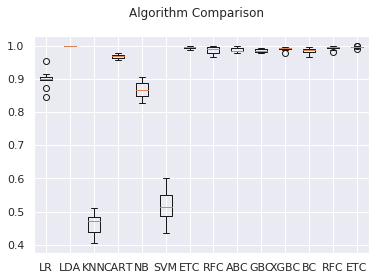

In [28]:
# Compare Algorithms
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

array = df_red.values
X = array[:,0:6]
Y = array[:,6]
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf',gamma='auto')))
models.append(('ETC', ExtraTreesClassifier(n_estimators=100)))
models.append(('RFC', RandomForestClassifier(random_state=42,n_estimators=100)))
models.append(('ABC',AdaBoostClassifier(DecisionTreeClassifier(random_state=42,min_samples_split=10,min_samples_leaf=10),random_state=42,n_estimators=100,learning_rate=0.09)))
models.append(('GBC',GradientBoostingClassifier(learning_rate=0.09,random_state=42,n_estimators=100)))
models.append(('XGBC',xgb.XGBClassifier(random_state=42,learning_rate=0.9,n_estimators=100)))
models.append(('BC',BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)))
models.append(('RFC',RandomForestClassifier(n_estimators=100, max_features=4)))
models.append(('ETC',ExtraTreesClassifier(n_estimators=100, max_features=4)))
#models.append(('',))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [29]:
# LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

array = df_red.values
X = array[:,0:6]
Y = array[:,6]
kfold = KFold(n_splits=20, random_state=1)
model = LinearDiscriminantAnalysis()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)
model.score(x_test,y_test)

Accuracy: 1.000 (0.000)


1.0

In [30]:
# Voting Ensemble for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

array = df_red.values
X = array[:,0:6]
Y = array[:,6]
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
estimators.append(('LR', LogisticRegression()))
print 'LR'
estimators.append(('LDA', LinearDiscriminantAnalysis()))
print 'LDA'
estimators.append(('CART', DecisionTreeClassifier()))
print 'CART'
estimators.append(('NB', GaussianNB()))
print 'NB'
estimators.append(('ABC',AdaBoostClassifier(DecisionTreeClassifier(random_state=42,min_samples_split=10,min_samples_leaf=10),random_state=42,n_estimators=100,learning_rate=0.09)))
print 'ABC'
estimators.append(('GBC',GradientBoostingClassifier(learning_rate=0.09,random_state=42,n_estimators=100)))
print 'GBC'
estimators.append(('XGBC',xgb.XGBClassifier(random_state=42,learning_rate=0.9,n_estimators=100)))
print 'XGBC'
estimators.append(('BC',BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)))
print 'BC'
estimators.append(('RFC',RandomForestClassifier(n_estimators=100, max_features=4)))
print 'RFC'
estimators.append(('ETC',ExtraTreesClassifier(n_estimators=100, max_features=4)))
print 'ETC'
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

LR
LDA
CART
NB
ABC
GBC
XGBC
BC
RFC
ETC
0.993672217353199
